In [61]:
%load_ext autoreload
%autoreload 2
from main import *
from data import load_data, load_config, generate_k_fold_set, z_score_normalize, one_hot_encoding, shuffle
from train import *
from neuralnet import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
#args = parse_args()

# Load the configuration.
config = load_config("./config.yaml")

# Load the data
train_data, (x_test, y_test) = load_data(), load_data(train=False)
X,y = shuffle(train_data)
split = int(len(X) * 0.8) 
x_train, y_train, x_val, y_val = X[:split], y[:split], X[split:], y[split:]

# Any pre-processing on the datasets goes here.
x_train = z_score_normalize(x_train)[0]
x_val = z_score_normalize(x_val)[0]
y_train = one_hot_encoding(y_train)
y_val = one_hot_encoding(y_val)
x_test = z_score_normalize(x_test)[0]
y_test = one_hot_encoding(y_test)

In [63]:
x_train.shape

(48000, 784)

In [75]:
config

{'layer_specs': [784, 128, 10],
 'activation': 'ReLU',
 'learning_rate': 0.005,
 'batch_size': 128,
 'epochs': 50,
 'early_stop': True,
 'early_stop_epoch': 5,
 'L2_penalty': 0,
 'momentum': True,
 'momentum_gamma': 0.9,
 'L1_penalty': 0.001}

In [77]:
config['L1_penalty'] = 1e-6

Epoch 1, Train loss = 0.6331519076716794, Train acc = 0.8097291666666667, Val Loss = 0.4154073345242043, Val acc = 0.87525
Epoch 2, Train loss = 0.3362333278907846, Train acc = 0.9041666666666667, Val Loss = 0.3349531052625185, Val acc = 0.9005
Epoch 3, Train loss = 0.26604035645228713, Train acc = 0.9252291666666667, Val Loss = 0.2981062561921779, Val acc = 0.9106666666666666
Epoch 4, Train loss = 0.2227262376581711, Train acc = 0.939625, Val Loss = 0.27174595489110037, Val acc = 0.9198333333333333
Epoch 5, Train loss = 0.19249185865964183, Train acc = 0.948625, Val Loss = 0.2547927281248468, Val acc = 0.9253333333333333
Epoch 6, Train loss = 0.16895426786270598, Train acc = 0.9561875, Val Loss = 0.24516400355332787, Val acc = 0.927
Epoch 7, Train loss = 0.1497642130834741, Train acc = 0.962375, Val Loss = 0.23832605161151382, Val acc = 0.9305
Epoch 8, Train loss = 0.1341599509388505, Train acc = 0.9681458333333334, Val Loss = 0.22825037159835532, Val acc = 0.93175
Epoch 9, Train loss

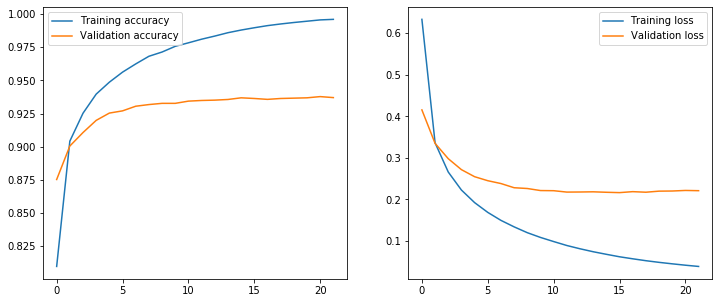

PicklingError: Can't pickle <class 'neuralnet.NeuralNetwork'>: it's not the same object as neuralnet.NeuralNetwork

In [78]:
train_mlp(x_train, y_train, x_val, y_val, x_test, y_test, config)

In [66]:
check_gradients(x_train, y_train, config)

b gradient:  -0.0030920584234646344 numerical estimation:  -0.003100751969653537
w1 gradient:  -0.0003071837360790517 numerical estimation:  -0.00031094367376471865
w2 gradient:  -0.0009113640832202567 numerical estimation:  -0.0009177014040240294
b gradient:  0.02151363999298341 numerical estimation:  0.02151288373131166
backprop check pass
w1 gradient:  0.0845790196450153 numerical estimation:  0.08457694318952935
backprop check pass
w2 gradient:  -0.00011837409132030645 numerical estimation:  -0.00011913462594215218


In [ ]:
-0.0005147172192341892  -  -0.0005146885019069458

L1 Regularization
Epoch 1, Train loss = 4.047352929643632, Train acc = 0.809875, Val Loss = 0.4444051197141739, Val acc = 0.87175
Epoch 2, Train loss = 2.5126360914568333, Train acc = 0.894625, Val Loss = 0.3954895177079361, Val acc = 0.8909166666666667
Epoch 3, Train loss = 1.6837199182094555, Train acc = 0.9052291666666666, Val Loss = 0.3840633605639838, Val acc = 0.8951666666666667
Epoch 4, Train loss = 1.2293577804487952, Train acc = 0.9097916666666667, Val Loss = 0.37971865656692677, Val acc = 0.8963333333333333
Epoch 5, Train loss = 0.9985328453602821, Train acc = 0.91, Val Loss = 0.3789782061876297, Val acc = 0.8963333333333333
Epoch 6, Train loss = 0.8810560197291408, Train acc = 0.9118958333333333, Val Loss = 0.3771353132982356, Val acc = 0.89825
Epoch 7, Train loss = 0.8170206957601921, Train acc = 0.9132291666666666, Val Loss = 0.3700246226192507, Val acc = 0.8976666666666666
Epoch 8, Train loss = 0.7772396769035037, Train acc = 0.9152708333333334, Val Loss = 0.3562082945197

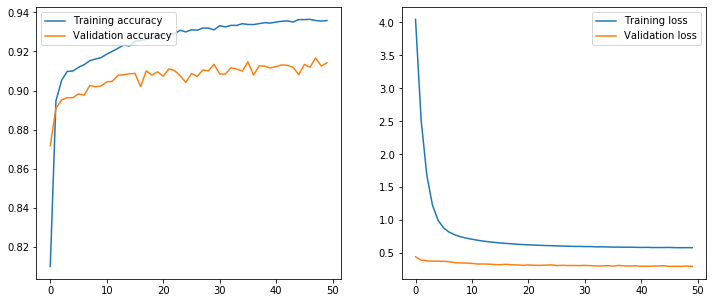

PicklingError: Can't pickle <class 'neuralnet.NeuralNetwork'>: it's not the same object as neuralnet.NeuralNetwork

In [73]:
regularization_experiment(x_train, y_train, x_val, y_val, x_test, y_test, config)

In [72]:
np.abs([-0.1, 9])

array([0.1, 9. ])

In [19]:
config

{'layer_specs': [784, 128, 10],
 'activation': 'tanh',
 'learning_rate': 0.005,
 'batch_size': 128,
 'epochs': 50,
 'early_stop': False,
 'early_stop_epoch': 5,
 'L2_penalty': 0.0001,
 'momentum': False,
 'momentum_gamma': 0.9}

In [9]:
import numpy as np
import pickle


config = {}
config['layer_specs'] = [784, 128, 10]  # The length of list denotes number of hidden layers; each element denotes number of neurons in that layer; first element is the size of input layer, last element is the size of output layer.
config['activation'] = 'tanh' # Takes values 'sigmoid', 'tanh' or 'ReLU'; denotes activation function for hidden layers
config['batch_size'] = 128  # Number of training samples per batch to be passed to network
config['epochs'] = 100  # Number of epochs to train the model
config['early_stop'] = False  # Implement early stopping or not
config['early_stop_epoch'] = 5  # Number of epochs for which validation loss increases to be counted as overfitting
config['L2_penalty'] = 0.0001  # Regularization constant
config['momentum'] = True  # Denotes if momentum is to be applied or not
config['momentum_gamma'] = 0.9  # Denotes the constant 'gamma' in momentum expression
config['learning_rate'] = 0.15 # Learning rate of gradient descent algorithm

def check_d_b(e, output_idx):
    layer.b[0][output_idx] += e
    loss_up = model.forward(x, targets=targets)
    layer.b[0][output_idx] -= 2*e
    loss_down = model.forward(x, targets=targets)
    num_d_b = (loss_up - loss_down) / (2 * e)
    layer.b[0][output_idx] += e
    return num_d_b

def check_d_w(e, input_idx, output_idx):
    layer.w[input_idx][output_idx] += e
    loss_up = model.forward(x, targets=targets)
    layer.w[input_idx][output_idx] -= 2*e
    loss_down = model.forward(x, targets=targets)
    num_d_w = (loss_up - loss_down) / (2 * e)
    layer.w[input_idx][output_idx] += e
    return num_d_w


x, targets = x_train, y_train
targets = one_hot_encoding(targets)
model = NeuralNetwork(config)

loss_train = model.forward(x, targets=targets)
model.backward()

e = 1e-2

d_w_lst, d_b_lst = [], []
for layer in model.layers:
    if isinstance(layer, Activation):
        continue
    d_b = check_d_b(e, 0)
    d_w_1 = check_d_w(e, 0, 0)
    d_w_2 = check_d_w(e, 0, 1)
    d_b_lst.append(d_b)
    d_w_lst.append([d_w_1, d_w_2])
    print('b gradient: ', layer.d_b[0], 'numerical estimation: ', d_b)
    print('w1 gradient: ', layer.d_w[0][0], 'numerical estimation: ', d_w_1)
    print('w2 gradient: ', layer.d_w[0][1], 'numerical estimation: ', d_w_2)

b gradient:  -0.0002227670521905497 numerical estimation:  0.00022274652788922822
w1 gradient:  -0.0001458368090674628 numerical estimation:  0.0001481457846397305
w2 gradient:  -0.0005181029317682649 numerical estimation:  0.0005247270371766533
b gradient:  0.00913754945426827 numerical estimation:  -0.009136658537500786
w1 gradient:  0.05181821588737849 numerical estimation:  -0.05181821357420624
w2 gradient:  -0.003182731468383268 numerical estimation:  0.003182659116673925


In [ ]:
# Run the writeup experiments here
if args.train_mlp:
    train_mlp(x_train, y_train, x_val, y_val, x_test, y_test, config)
if args.check_gradients:
    check_gradients(x_train, y_train, config)
if args.regularization:
    regularization_experiment(x_train, y_train, x_val, y_val, x_test, y_test, config)
if args.activation:
    activation_experiment(x_train, y_train, x_val, y_val, x_test, y_test, config)
if args.topology:
    topology_experiment(x_train, y_train, x_val, y_val, x_test, y_test, config)




In [10]:
a = np.array([[1,0],[0,1]])

In [13]:
a[0][1]

0

In [ ]:
np.random.seed(42)
x = np.random.randn(1, 100)
act_sigmoid = Activation('sigmoid')
act_tanh = Activation('tanh')
act_ReLU = Activation('ReLU')

x_image = np.random.randn(1, 784)

nnet = Neuralnetwork(config)
nnet.forward(x_image, targets = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
nnet.backward()

layer_no = 0
for layer_idx, layer in enumerate(nnet.layers):
    if isinstance(layer, neuralnet.Layer):
        layer_no += 1
        error_x = np.sum(np.abs(benchmark_data['nnet'].layers[layer_idx].x - layer.x))
        error_w = np.sum(np.abs(benchmark_data['nnet'].layers[layer_idx].w - layer.w))
        error_b = np.sum(np.abs(benchmark_data['nnet'].layers[layer_idx].b - layer.b))
        error_d_w = np.sum(np.abs(benchmark_data['nnet'].layers[layer_idx].d_w - layer.d_w))
        error_d_b = np.sum(np.abs(benchmark_data['nnet'].layers[layer_idx].d_b - layer.d_b))

        check_error(error_x, "Layer{} Input".format(layer_no))
        check_error(error_w, "Layer{} Weights".format(layer_no))
        check_error(error_b, "Layer{} Biases".format(layer_no))
        check_error(error_d_w, "Layer{} Weight Gradient".format(layer_no))
        check_error(error_d_b, "Layer{} Bias Gradient".format(layer_no))

